# Imports

In [42]:
import pandas as pd
import matplotlib.pyplot as plt


# Data Exploration

In [43]:
# Load
file_path = 'data/training_data.csv'
data = pd.read_csv(file_path)


/tmp/ipykernel_12383/1706297877.py:3: DtypeWarning: Columns (25,30,36,37,43,57) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [7]:
data.head()


First few rows of the dataset:


,Unnamed: 0,GDENAMK,GDENR,KTKZ,address,appartments,area,area_useable,balcony,basement,...,dist_to_haltst,dist_to_highway,dist_to_lake,dist_to_main_stat,dist_to_school_1,dist_to_train_stat,restaur_pix_count_km2,superm_pix_count_km2,dist_to_river,key
0,1,Cossonay,5477,VD,1304 Cossonay-Ville,NaN,95.0,NaN,NaN,NaN,...,343.284139,4285.860007,850.606268,NaN,187.216452,1908.393303,0,0,1127.536484,1
1,2,Saas-Fee,6290,VS,"Hannigstrasse 45, 3906 Saas-Fee VS",NaN,40.0,NaN,NaN,NaN,...,50.596443,18871.692160,NaN,NaN,267.725606,10781.225350,16,2,1176.552105,2
2,3,Lugano,5192,TI,6962 Viganello,NaN,112.0,NaN,NaN,NaN,...,115.935327,3678.544277,851.929528,1796.317344,60.166436,1796.317344,9,2,503.617894,3
3,4,Neuhausen am Rheinfall,2937,SH,"Poststrasse 11, 8212 Neuhausen am Rheinfall",NaN,104.0,NaN,1.0,NaN,...,90.708324,972.769243,1251.685970,404.105184,222.319590,377.810799,4,2,494.728855,4
4,5,Chavannes-des-Bois,5708,VD,1290 Versoix,NaN,180.0,NaN,NaN,NaN,...,71.449283,3793.947021,86.429425,418.852003,571.023642,418.852003,5,1,130.191710,5


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'GDENR'}>,
        <Axes: title={'center': 'appartments'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'area_useable'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'bath'}>,
        <Axes: title={'center': 'bath_tube'}>],
       [<Axes: title={'center': 'cabletv'}>,
        <Axes: title={'center': 'ceiling'}>,
        <Axes: title={'center': 'cheminee'}>,
        <Axes: title={'center': 'dishwasher'}>,
        <Axes: title={'center': 'dryer'}>,
        <Axes: title={'center': 'elevator'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'garden_m2'}>],
       [<Axes: title={'center': 'gardenshed'}>,
        <Axes: title={'center': 'heating_electro'}>,
        <Axes: title={'center': 'heating_gas'}>,
        <Axes: title={'ce

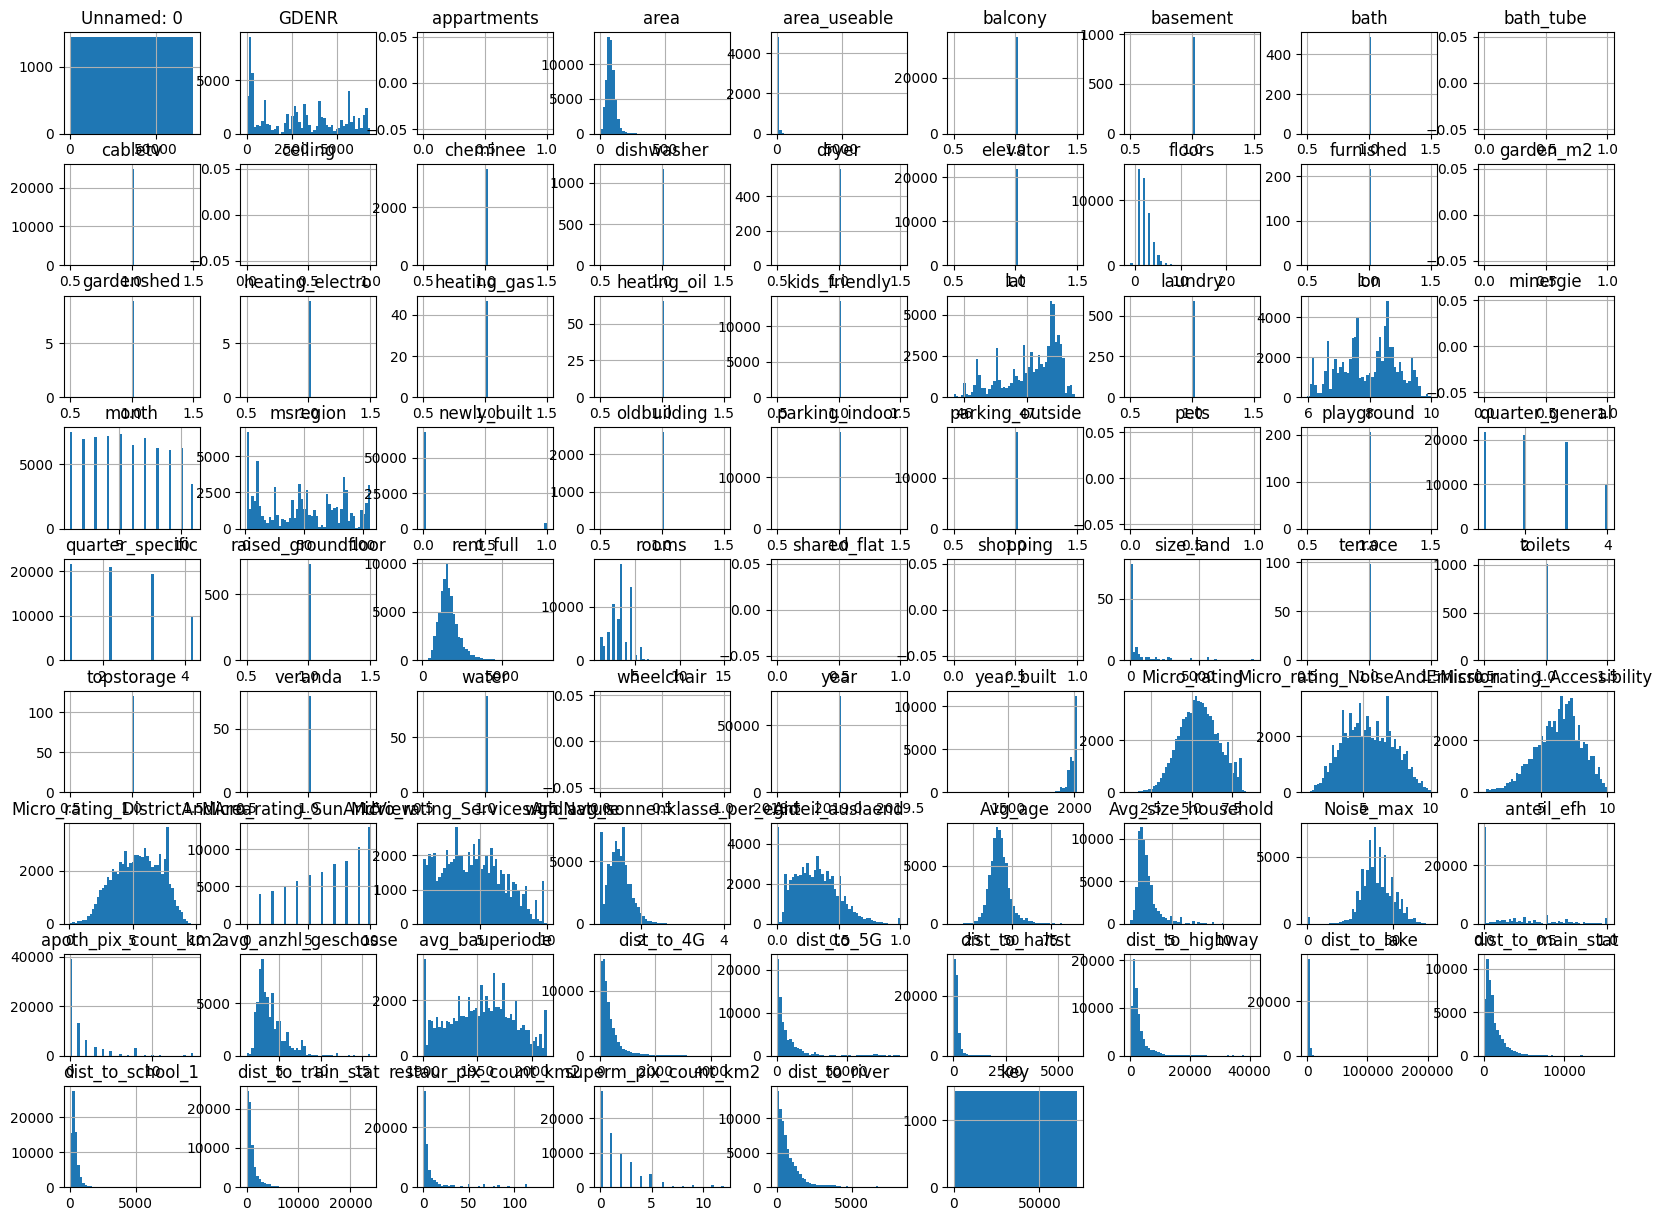

In [21]:
data.describe()


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'GDENR'}>,
        <Axes: title={'center': 'appartments'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'area_useable'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'bath'}>,
        <Axes: title={'center': 'bath_tube'}>],
       [<Axes: title={'center': 'cabletv'}>,
        <Axes: title={'center': 'ceiling'}>,
        <Axes: title={'center': 'cheminee'}>,
        <Axes: title={'center': 'dishwasher'}>,
        <Axes: title={'center': 'dryer'}>,
        <Axes: title={'center': 'elevator'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'garden_m2'}>],
       [<Axes: title={'center': 'gardenshed'}>,
        <Axes: title={'center': 'heating_electro'}>,
        <Axes: title={'center': 'heating_gas'}>,
        <Axes: title={'ce

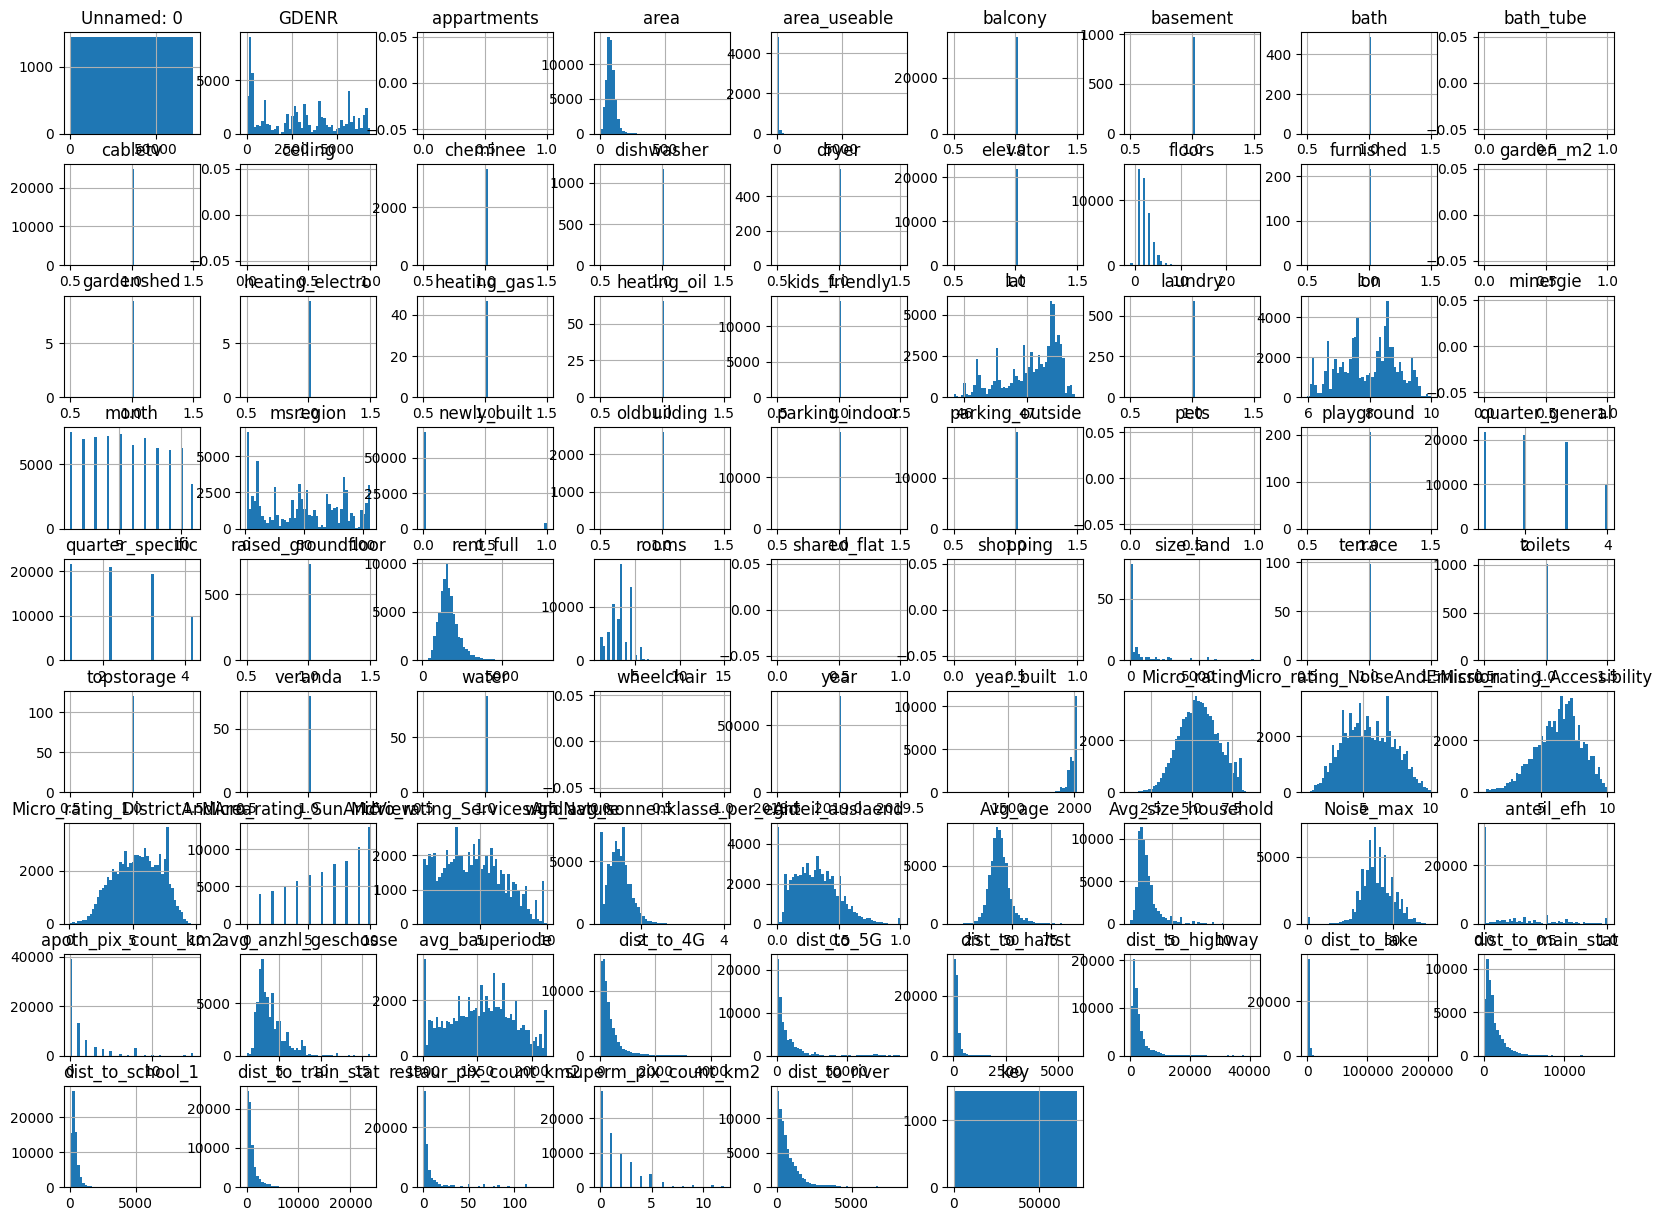

In [22]:
data.hist(bins=50, figsize=(20,15))


In [9]:
data.info()



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 95 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      72000 non-null  int64  
 1   GDENAMK                         72000 non-null  object 
 2   GDENR                           72000 non-null  int64  
 3   KTKZ                            72000 non-null  object 
 4   address                         72000 non-null  object 
 5   appartments                     0 non-null      float64
 6   area                            57678 non-null  float64
 7   area_useable                    4963 non-null   float64
 8   balcony                         34583 non-null  float64
 9   basement                        971 non-null    float64
 10  bath                            487 non-null    float64
 11  bath_tube                       0 non-null      float64
 12  cabletv                  

In [23]:
data.columns.tolist()


['Unnamed: 0',
 'GDENAMK',
 'GDENR',
 'KTKZ',
 'address',
 'appartments',
 'area',
 'area_useable',
 'balcony',
 'basement',
 'bath',
 'bath_tube',
 'cabletv',
 'ceiling',
 'cheminee',
 'date',
 'descr',
 'dishwasher',
 'dryer',
 'elevator',
 'floors',
 'furnished',
 'garden_m2',
 'gardenshed',
 'heating_air',
 'heating_earth',
 'heating_electro',
 'heating_far',
 'heating_gas',
 'heating_oil',
 'heating_pellets',
 'home_type',
 'kids_friendly',
 'lat',
 'laundry',
 'lon',
 'manlift',
 'middle_house',
 'minergie',
 'month',
 'msregion',
 'newly_built',
 'oldbuilding',
 'oven',
 'parking_indoor',
 'parking_outside',
 'pets',
 'playground',
 'pool',
 'quarter_general',
 'quarter_specific',
 'quiet',
 'raised_groundfloor',
 'rent_full',
 'rooms',
 'shared_flat',
 'shopping',
 'shower',
 'size_land',
 'sunny',
 'terrace',
 'toilets',
 'topstorage',
 'veranda',
 'water',
 'wheelchair',
 'year',
 'year_built',
 'Micro_rating',
 'Micro_rating_NoiseAndEmission',
 'Micro_rating_Accessibility',


In [18]:
data['area'].value_counts()



Value counts for Category column:


area
80.0     1930
100.0    1795
70.0     1789
90.0     1756
60.0     1541
         ... 
274.0       1
231.0       1
256.0       1
552.0       1
550.0       1
Name: count, Length: 276, dtype: int64

# Data Cleaning

In [24]:
data.columns.tolist()


['Unnamed: 0',
 'GDENAMK',
 'GDENR',
 'KTKZ',
 'address',
 'appartments',
 'area',
 'area_useable',
 'balcony',
 'basement',
 'bath',
 'bath_tube',
 'cabletv',
 'ceiling',
 'cheminee',
 'date',
 'descr',
 'dishwasher',
 'dryer',
 'elevator',
 'floors',
 'furnished',
 'garden_m2',
 'gardenshed',
 'heating_air',
 'heating_earth',
 'heating_electro',
 'heating_far',
 'heating_gas',
 'heating_oil',
 'heating_pellets',
 'home_type',
 'kids_friendly',
 'lat',
 'laundry',
 'lon',
 'manlift',
 'middle_house',
 'minergie',
 'month',
 'msregion',
 'newly_built',
 'oldbuilding',
 'oven',
 'parking_indoor',
 'parking_outside',
 'pets',
 'playground',
 'pool',
 'quarter_general',
 'quarter_specific',
 'quiet',
 'raised_groundfloor',
 'rent_full',
 'rooms',
 'shared_flat',
 'shopping',
 'shower',
 'size_land',
 'sunny',
 'terrace',
 'toilets',
 'topstorage',
 'veranda',
 'water',
 'wheelchair',
 'year',
 'year_built',
 'Micro_rating',
 'Micro_rating_NoiseAndEmission',
 'Micro_rating_Accessibility',


In [37]:
data['appartments'].unique()
# Column is empty -> drop
data.drop('appartments', axis=1, inplace=True)
# drop address since lat & lon available
data.drop('address', axis=1, inplace=True)


KeyError: 'appartments'

array(['1304 Cossonay-Ville', 'Hannigstrasse 45, 3906 Saas-Fee VS',
       '6962 Viganello', ..., 'Rue des Vignettes 17, 1957 Ardon',
       'Champs-Frechets 26, 1217 Meyrin',
       'Mittelgäustrasse 78, 4612 Wangen b. Olten'], dtype=object)